<a href="https://colab.research.google.com/github/svabbi16/Applied-AI-Transport/blob/main/Module%207/Module7_Svavar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 7: Using neural network models for bus delay prediction

Student: Svavar Hrafn Ágústsson

Date: 26. Sep 2023

###Data Preparation

In [ ]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


In [ ]:
df = df.iloc[:1000]

In [ ]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

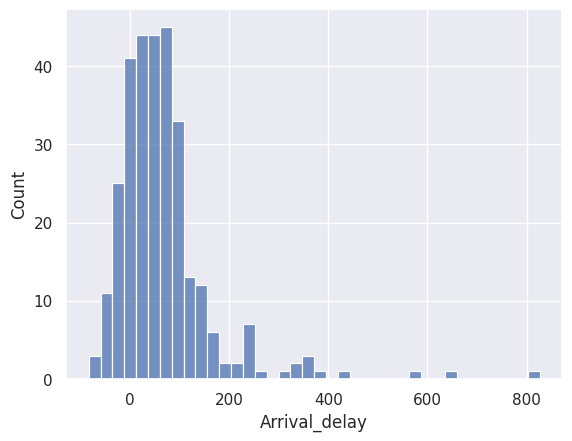

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])


In [ ]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

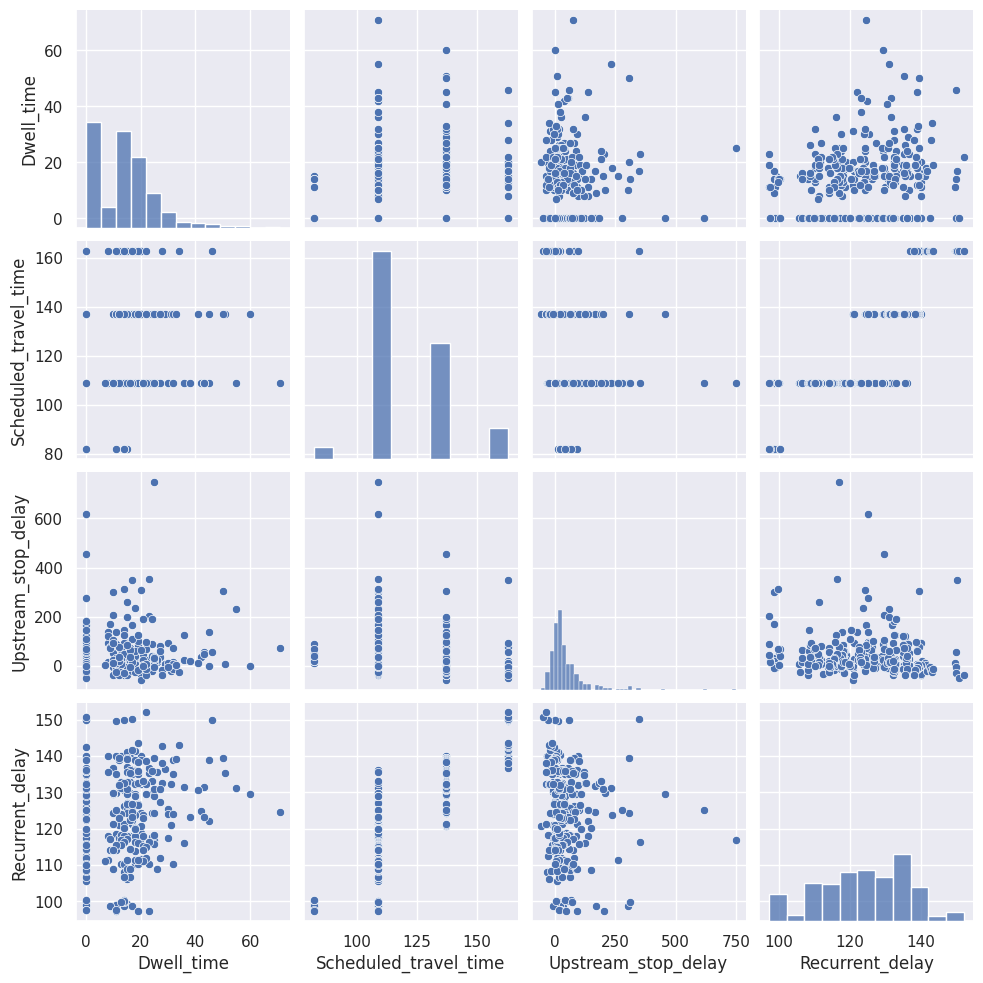

In [ ]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

Create a neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training and prediction

Epoch 1/200
6/6 [==============================] - 3s 101ms/step - loss: 68.4847 - mae: 68.4847 - val_loss: 67.5102 - val_mae: 67.5102
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 60.3341 - mae: 60.3341 - val_loss: 63.0439 - val_mae: 63.0439
Epoch 3/200
6/6 [==============================] - 0s 46ms/step - loss: 54.0966 - mae: 54.0966 - val_loss: 60.3523 - val_mae: 60.3523
Epoch 4/200
6/6 [==============================] - 0s 32ms/step - loss: 50.3932 - mae: 50.3932 - val_loss: 55.9896 - val_mae: 55.9896
Epoch 5/200
6/6 [==============================] - 0s 35ms/step - loss: 46.1872 - mae: 46.1872 - val_loss: 50.5317 - val_mae: 50.5317
Epoch 6/200
6/6 [==============================] - 0s 51ms/step - loss: 41.7814 - mae: 41.7814 - val_loss: 45.2178 - val_mae: 45.2178
Epoch 7/200
6/6 [==============================] - 0s 42ms/step - loss: 38.7635 - mae: 38.7635 - val_loss: 40.4779 - val_mae: 40.4779
Epoch 8/200
6/6 [==============================] - 0s 52ms/st

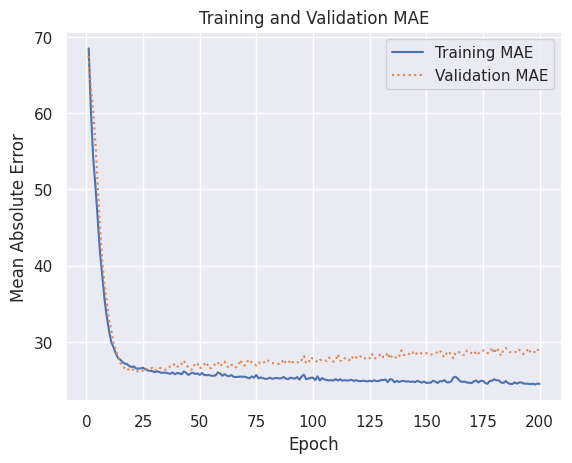

In [ ]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

###Evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 33.01442772895098
Mean Squared Error: 1800.6882814041903
R-squared: 0.72092893709034


###Visualize the Results

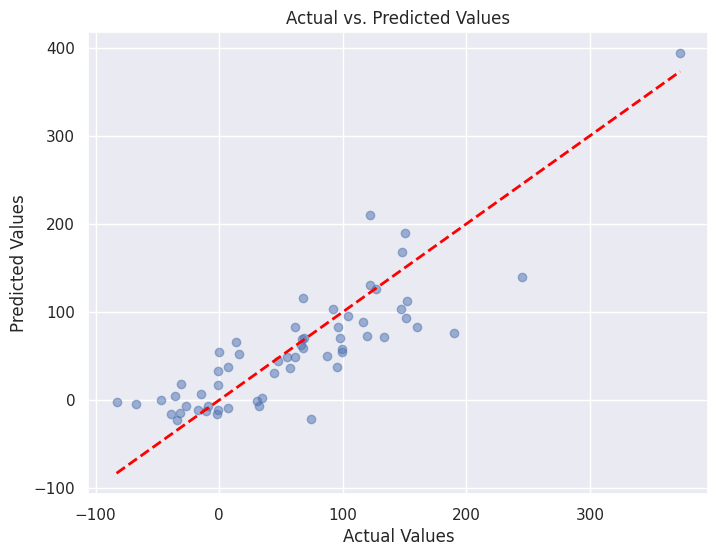

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

##Task 2: Practical NN training techniques


Epoch 1: val_mae improved from inf to 44.19700, saving model to weights.best.h5

Epoch 2: val_mae improved from 44.19700 to 34.53841, saving model to weights.best.h5

Epoch 3: val_mae improved from 34.53841 to 34.42142, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_mae did not improve from 34.42142

Epoch 5: val_mae improved from 34.42142 to 33.39249, saving model to weights.best.h5

Epoch 6: val_mae improved from 33.39249 to 32.87442, saving model to weights.best.h5

Epoch 7: val_mae improved from 32.87442 to 32.60295, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 32.60295

Epoch 9: val_mae improved from 32.60295 to 32.38973, saving model to weights.best.h5

Epoch 10: val_mae improved from 32.38973 to 31.98449, saving model to weights.best.h5

Epoch 11: val_mae did not improve from 31.98449

Epoch 12: val_mae did not improve from 31.98449

Epoch 13: val_mae did not improve from 31.98449

Epoch 14: val_mae improved from 31.98449 to 31.41535, saving model to weights.best.h5

Epoch 15: val_mae improved from 31.41535 to 31.36617, saving model to weights.best.h5

Epoch 16: val_mae did not improve from 31.36617

Epoch 17: val_mae did not improve from 31.36617

Epoch 18: val_mae did not improve from 31.36617

Epoc

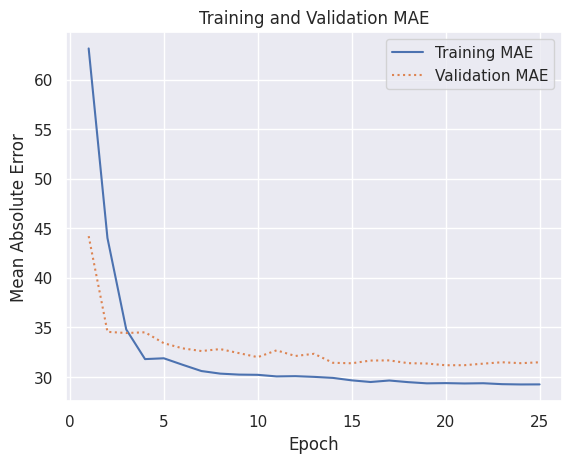

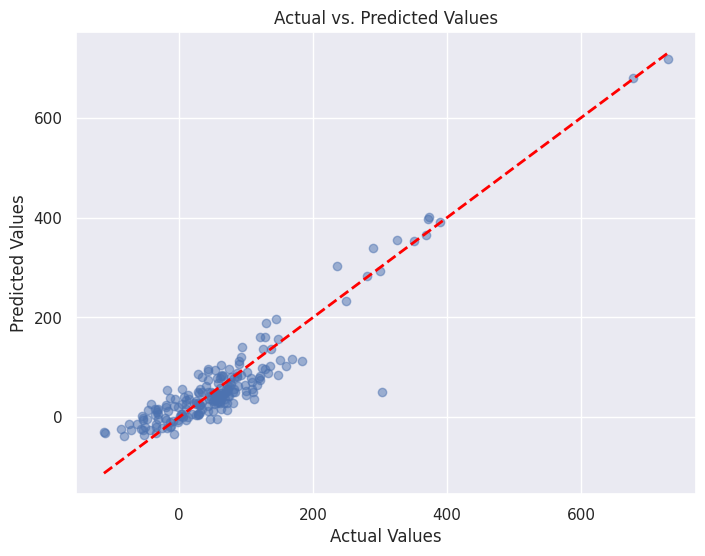

In [ ]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(32, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model

model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************


#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can choose to use the callback function or not**************
# Do not use the callback function
# hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function or not*************

#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()


# **Task 3: Compare the results with a linear regression model**



Epoch 1: val_mae improved from inf to 43.87499, saving model to weights.best.h5

Epoch 2: val_mae improved from 43.87499 to 35.10706, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 35.10706 to 31.43278, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 31.43278

Epoch 5: val_mae did not improve from 31.43278

Epoch 6: val_mae did not improve from 31.43278

Epoch 7: val_mae did not improve from 31.43278

Epoch 8: val_mae did not improve from 31.43278
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 30.794004853218794
Mean Squared Error: 1661.3936807373552
R-squared: 0.859179942989498
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 27.21289652419807
Mean Squared Error of linear model: 1369.2194384581421
R-squared of linear model: 0.8839446895584742


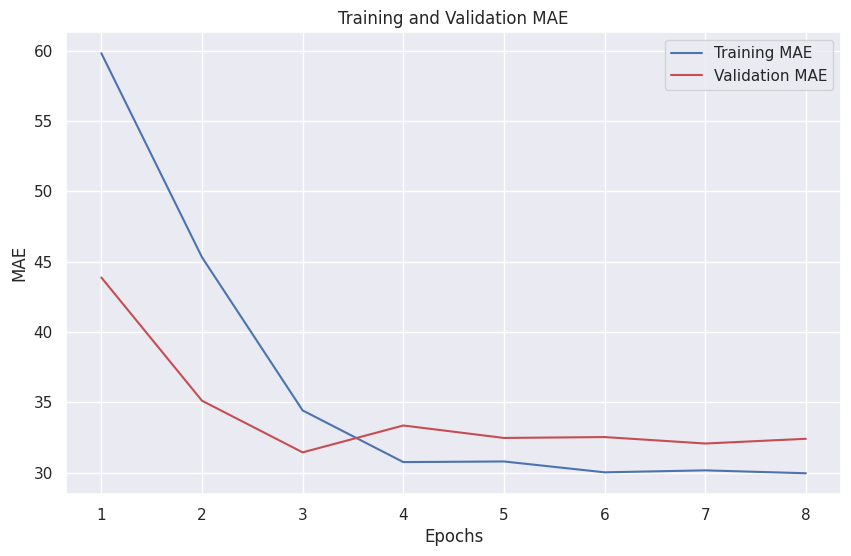

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")


plt.figure(figsize=(10, 6))
plt.plot(epochs, err, 'b-', label='Training MAE')
plt.plot(epochs, val_err, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Layers", "Dropout Rate", "Learning Rate", "MAE"])

# Search parameters
layer_configs = [[32, 64], [64, 128, 64], [128, 256, 128, 64]]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0001]

for config in layer_configs:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:

            model = Sequential()

            # Add layers from config
            model.add(Dense(config[0], activation='relu', input_dim=4))
            for units in config[1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(dropout_rate))

            model.add(Dense(1))

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

            # Callbacks
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

            # Train without verbose and without ModelCheckpoint for simplicity
            hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

            val_mae = min(hist.history['val_mae'])

            # Append results to the DataFrame
            results_df = results_df.append({
                "Layers": str(config),
                "Dropout Rate": dropout_rate,
                "Learning Rate": learning_rate,
                "MAE": val_mae
            }, ignore_index=True)

# Print the results in a tabular form
print(results_df)

# To find the best configuration, sort the DataFrame based on MAE
best_row = results_df.sort_values(by="MAE").iloc[0]
print("\nBest Configuration:")
print(best_row)

<ipython-input-20-3532fcda2a7b>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-3532fcda2a7b>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-3532fcda2a7b>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-3532fcda2a7b>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-20-3532fcda2a7b>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

                 Layers  Dropout Rate  Learning Rate        MAE
0              [32, 64]           0.2         0.0010  31.456615
1              [32, 64]           0.2         0.0001  30.208797
2              [32, 64]           0.3         0.0010  30.969162
3              [32, 64]           0.3         0.0001  31.648327
4              [32, 64]           0.4         0.0010  31.537176
5              [32, 64]           0.4         0.0001  30.993891
6         [64, 128, 64]           0.2         0.0010  30.728357
7         [64, 128, 64]           0.2         0.0001  31.240290
8         [64, 128, 64]           0.3         0.0010  29.947186
9         [64, 128, 64]           0.3         0.0001  31.460155
10        [64, 128, 64]           0.4         0.0010  30.856272
11        [64, 128, 64]           0.4         0.0001  32.124580
12  [128, 256, 128, 64]           0.2         0.0010  29.354767
13  [128, 256, 128, 64]           0.2         0.0001  32.093422
14  [128, 256, 128, 64]           0.3   

<ipython-input-20-3532fcda2a7b>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
x

,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,0,82,33,99.925373
1,0,82,52,100.191176
2,0,82,10,99.681159
3,15,82,27,99.385714
4,0,109,17,116.298507
...,...,...,...,...
995,9,109,10,121.546012
996,0,109,40,122.094340
997,43,109,52,121.878505
998,15,109,6,121.527778
